In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [63]:
df = pd.read_csv('kc_house_data.csv')

The following is a desrciption of column names:
<font size="4">
- **id** - unique identified for a house
- **dateDate** - house was sold
- **pricePrice** - is prediction target
- **bedroomsNumber** - of Bedrooms/House
- **bathroomsNumber** - of bathrooms/bedrooms
- **sqft_livingsquare** - footage of the home
- **sqft_lotsquare** - footage of the lot
- **floorsTotal** - floors (levels) in house
- **waterfront** - House which has a view to a waterfront
- **view** - Has been viewed
- **condition** - How good the condition is ( Overall )
- **grade** - overall grade given to the housing unit, based on King County grading system
- **sqft_above** - square footage of house apart from basement
- **sqft_basement** - square footage of the basement
- **yr_built** - Built Year
- **yr_renovated** - Year when house was renovated
- **zipcode** - zip
- **lat** - Latitude coordinate
- **long** - Longitude coordinate
- **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
- **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors</font>

In [64]:
df.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


The first step will be to look through the data to get a better understanding of what we're working with. 

In [65]:
df.info()
#looking through the data, I initially see a few columns that are down as objects, 
#these will need to be adjusted to floats to be used in our regression analysis. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [66]:
#replacing '?' values in the 'sqft_basement' column with Null values, then converting to a float. 
df['sqft_basement'] = df['sqft_basement'].replace('?', np.nan)
df['sqft_basement'] = df['sqft_basement'].astype(float)

In [67]:
#I will normalize the year built column, by making the earliest year equal to 0. This will make the maximum year, 
#which was 2015, equal to 115
df['yr_built']= df['yr_built'] - 1900


In [68]:
df['yr_built'].describe()

count    21597.000000
mean        70.999676
std         29.375234
min          0.000000
25%         51.000000
50%         75.000000
75%         97.000000
max        115.000000
Name: yr_built, dtype: float64

In [69]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,55,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,51,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,33,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,65,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,87,0.0,98074,47.6168,-122.045,1800,7503


In [70]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [71]:
df2 = df.drop(['date', 'id', 'lat','long'], axis=1)
df2.head()
#dropping ID from the data, as this is an individual number, and isn't useful in our regression modelling. 
#dropping date from the data to begin, as this complecates the model. may come back to this..... 


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,55,0.0,98178,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,51,1991.0,98125,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,33,NaN,98028,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,65,0.0,98136,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,87,0.0,98074,1800,7503


In [72]:
selected_row = df2[df2['bedrooms'] == 33]

print(selected_row)

          price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
15856  640000.0        33       1.75         1620      6000     1.0   

       waterfront  view  condition  grade  sqft_above  sqft_basement  \
15856         0.0   0.0          5      7        1040          580.0   

       yr_built  yr_renovated  zipcode  sqft_living15  sqft_lot15  
15856        47           0.0    98103           1330        4700  


In [73]:
#it looks like this might be a data entry error. It is unlikely this house has 33 bedrooms and less than 2 bathrooms.
#we will remove this row

df2 = df2.drop(df2[df2['bedrooms'] == 33].index)

df2.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,55,0.0,98178,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,51,1991.0,98125,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,33,NaN,98028,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,65,0.0,98136,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,87,0.0,98074,1800,7503


In [74]:
outcome = 'price'
predictors = df2.drop('price', axis=1)
pred_sum ='+'.join(predictors.columns)
formula = outcome + '~' + pred_sum

In [75]:
model = ols(formula=formula, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.656
Model:                            OLS   Adj. R-squared:                  0.656
Method:                 Least Squares   F-statistic:                     1963.
Date:                Sun, 24 Mar 2024   Prob (F-statistic):               0.00
Time:                        16:19:00   Log-Likelihood:            -2.1160e+05
No. Observations:               15429   AIC:                         4.232e+05
Df Residuals:                   15413   BIC:                         4.233e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.543e+06   3.69e+06     -0.418      0.676   -8.78e+06     5.7e+06
bedrooms      -4.072e+04   2408.575    -16.907      0.000   -4.54e+04    -3.6e+04
bathrooms      4.848e+04   4191.867     11.564      0.000    4.03e+04    5.67e+04
sqft_living     115.0711      2.907     39.590      0.000     109.374     120.768
sqft_lot         -0.0437      0.060     -0.723      0.469      -0.162       0.075
floors          2.44e+04   4616.144      5.286      0.000    1.54e+04    3.34e+04
waterfront     6.145e+05   2.24e+04     27.413      0.000    5.71e+05    6.58e+05
view           4.436e+04   2760.271     16.070      0.000    3.89e+04    4.98e+04
condition      1.884e+04   3019.366      6.241      0.000    1.29e+04    2.48e+04
grade          1.175e+05   2722.169     43.176      0.000    1.12e+05    1.23e+05
sqft_above       58.9057      2.834     20.783      0.000      53.350      64.461
sqft_basement    56.1654      3.339     16.819      0.000      49.620      62.711
yr_built      -3633.0171     89.342    -40.664      0.000   -3808.138   -3457.896
yr_renovated     11.2421      4.749      2.367      0.018       1.934      20.550
zipcode           9.9046     37.633      0.263      0.792     -63.861      83.670
sqft_living15    17.2329      4.390      3.925      0.000       8.627      25.839
sqft_lot15       -0.4890      0.092     -5.316      0.000      -0.669      -0.309
==============================================================================
Omnibus:                    11913.870   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           939707.671
Skew:                           3.109   Prob(JB):                         0.00
Kurtosis:                      40.724   Cond. No.                     3.30e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.44e-21. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

We get an adj. R squared value of 0.65. Showing there is a fairly high correlation between all the data and the price of housing. 

*The p-value represents a probability of observing your results (or something more extreme) given that the null hypothesis is true*

The majority of column variables yield a p-value of 0. This implies that we can reject the null hypothesis that suggests these columns have no impact on house price.

***sqft_lot*** had a p-value of 0.096 and ***floors*** had a p-value of 0.302. So using the standard alpha value of 0.05, we wouldn't be able to reject the null hypothesis


In [76]:
residuals = model.resid  # Get the residuals
fitted_values = model.fittedvalues  # Get the predicted values

# Perform Breusch-Pagan test for homoskedasticity
bp_test = sm.stats.het_breuschpagan(residuals, model.model.exog)
print("Breusch-Pagan test p-value:", bp_test[1])

# we can see that the Breusch Pagan test gives a p-value of 0.0. This suggests evidence of homoscecatisity, implying variance
# is roughly equal across the data. 

Breusch-Pagan test p-value: 0.0


***We will now move on to a second iteration. We will take a closer look at the categorical variables and add dummy variables. 
I will look at multicolinearity, and remove and variables that are too similar.***

In [77]:
continuous = ['price', 'sqft_living',
       'sqft_lot','sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated','sqft_living15', 'sqft_lot15']

categoricals = ['bedrooms', 'bathrooms','floors', 'waterfront', 'view', 'condition', 'grade', 'zipcode']

Lets take a look at our categorical columns compared to price:

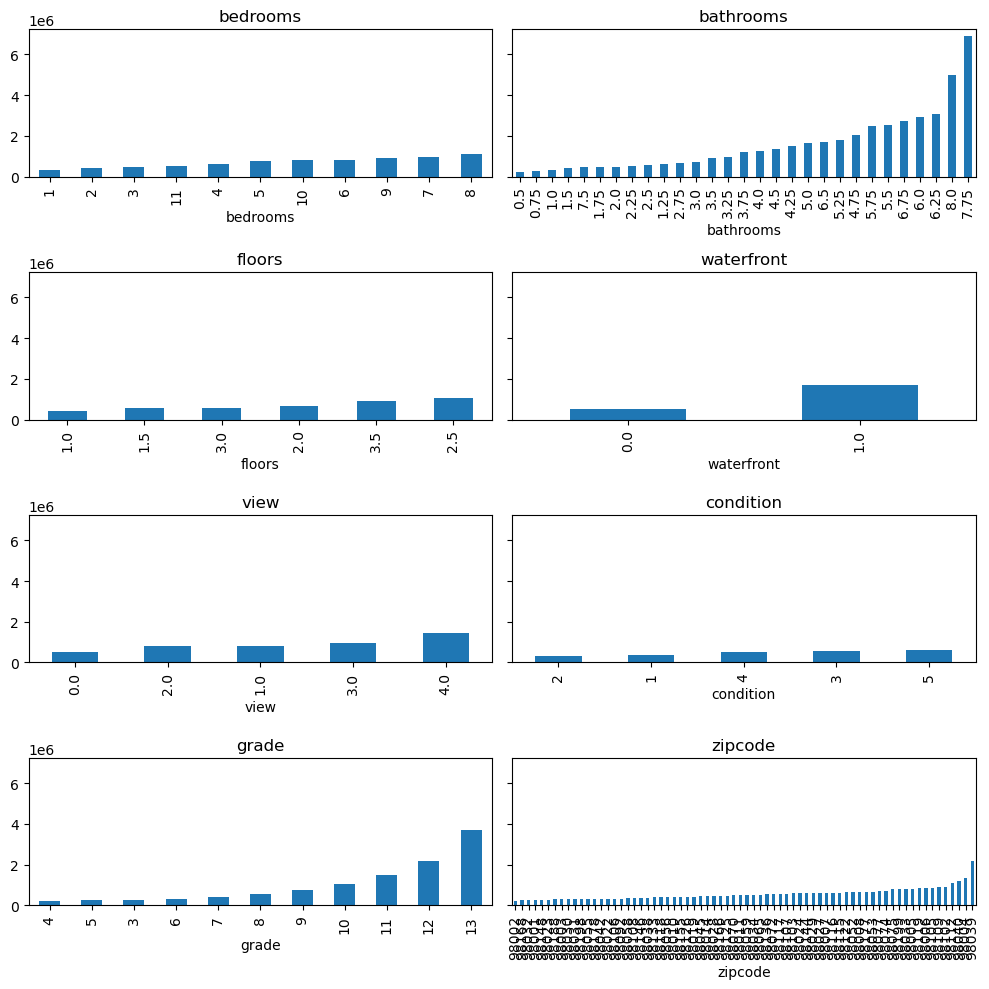

In [78]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(10,10), sharey=True)

for col, ax in zip(categoricals, axes.flatten()):
    (df2.groupby(col)               # group values together by column of interest
         .mean()['price']        # take the mean of the saleprice for each group
         .sort_values()              # sort the groups in ascending order
         .plot
         .bar(ax=ax))                # create a bar graph on the ax
    
    ax.set_title(col)                # Make the title the name of the column
  
    
fig.tight_layout()

Looking at graphs above there are a few interesting things we can see. For **bedrooms**, **bathrooms**, **view** and **grade**, we can clearly see that the higher the number, the higher the price of the house. 

Interestingly, this is not the case for **floors** and **condition**. Houses with 3 floors are on average worth less than houses with 2 floors. Perhaps some of the 3 story houses are inner city tenements, which would bring the price down. Note there is not much of a difference in house value between condition 1 & 2, and condition 3 & 4. Buyers should not place much emphesis on this rating, when compared to other factors. 

Although there are too many **zipcodes** to properly examine in the above graph, we can clearly see that zipcode plays an important role in house price. We will however be removing zipcodes from the model, as zipcodes will not work with a regression model. 

In [79]:
#lets reduce the number of categories in the categorical some of the columns, to make them easier to work with
bins = [0, 2.1, 4.1, float('inf')]
labels = ['low', 'medium', 'high']
df2['bedrooms'] = pd.cut(df2['bedrooms'], bins=bins, labels=labels, right=False)

#houses with 1-2 beds = 'low'
#houses with 3-4 beds = 'medium'
#houses with 5+ beds = 'high'

In [80]:
bins = [0, 1.1, 4.1, float('inf')]
labels = ['low', 'medium', 'high']
df2['bathrooms'] = pd.cut(df2['bathrooms'], bins=bins, labels=labels, right=False)
#0-1 bathrooms = 'low'
#2-4 bathrooms = medium
#5+ bathrooms = high

In [81]:
bins = [0, 5.1, 8.1, 10.1, float('inf')]
labels = ['low', 'medium', 'high', 'highest']
df2['grade'] = pd.cut(df2['grade'], bins=bins, labels=labels, right=False)
#0-5 = 'low'
#6-8 = 'medium'
#9-10 = 'high'
#11-13 = 'highest'

In [82]:
bins = [0, 1.9, 2.9, float('inf')]
labels = ['1', '2', '3plus',]
df2['floors'] = pd.cut(df2['floors'], bins=bins, labels=labels, right=False)

In [83]:
continuous = ['price', 'sqft_living',
       'sqft_lot','sqft_above', 'sqft_basement', 'yr_built','sqft_living15', 'sqft_lot15']

categoricals = ['bedrooms', 'bathrooms','floors', 'waterfront', 'view', 'condition', 'grade', 'zipcode', 'renovated']

df_continuous = df2[continuous]
df_categorical = df2[categoricals].drop('zipcode', axis =1)

KeyError: "['renovated'] not in index"

In [ ]:
df_categorical.head()

In [ ]:
#first change the d-type of the categorical columns, so we can get dummy versions
df_categorical = df_categorical.astype('category')


df_dummies = pd.get_dummies(df_categorical, prefix=df_categorical.columns, drop_first=True)
df_dummies.columns = [col.replace('.0', '') for col in df_dummies.columns]
df_dummies = df_dummies.astype(int)

In [ ]:
df_dummies.head()

In [ ]:
df_premodel = df2.drop(df_categorical.columns, axis=1)
#firstly, we remove columns that are categorical, to then add the dummy versions of these columns

df_premodel = pd.concat([df_premodel, df_dummies], axis=1)
df_premodel = df_premodel.drop('zipcode', axis = 1)
#pd.set_option('display.max_columns', None) #changing the number of columns so I can see if the table looks correct
df_premodel.head()

In [ ]:
df3 = df_continuous.drop('price', axis = 1)
pd.plotting.scatter_matrix(df3,figsize  = [9, 9]);
plt.show()

Having a quick glance at the scatter matrix above, we can already see a few variables that are highly correlated. We will aim to find highly correlated variables and remove them from the model. If we do not, we risk small changes to the model causing big fluctuations, making the model less reliable. 

In [ ]:
abs(df3.corr()) > 0.75

In [ ]:
#save absolute value of correlation matrix as a data frame
# converts all values to absolute value
# stacks the row:column pairs into a multindex
# reset the index to set the multindex to seperate columns
# sort values. 0 is the column automatically generated by the stacking

df4=df3.corr().abs().stack().reset_index().sort_values(0, ascending=False)

# zip the variable name columns (Which were only named level_0 and level_1 by default) in a new column named "pairs"
df4['pairs'] = list(zip(df4.level_0, df4.level_1))

# set index to pairs
df4.set_index(['pairs'], inplace = True)

#drop level columns
df4.drop(columns=['level_1', 'level_0'], inplace = True)

# rename correlation column as cc rather than 0
df4.columns = ['cc']

# drop duplicates. This could be dangerous if you have variables perfectly correlated with variables other than themselves.

df4.drop_duplicates(inplace=True)

In [ ]:
df4[(df4.cc>.75) & (df4.cc <1)]

In [ ]:
df_premodel = df_premodel.drop(['sqft_above', 'sqft_living15'], axis =1)

We see that ***sqft_living*** and ***sqft_above*** are highly correlated. This makes sense, and clearly the total sqft of the home will be proportional to the total sqft of the home, minus the basement. 

We also see that the average sqft_living of the home is proportional to the sqft_living of the nearest 15 neighbours. 

***sqft_above*** and **sqft_living15** will be removed from the model.

In [ ]:
outcome = 'price'
predictors = df_premodel.drop('price', axis=1)
pred_sum = '+'.join(predictors.columns)
formula = outcome + '~' + pred_sum

In [ ]:
model = ols(formula=formula, data=df_premodel).fit()
model.summary()

In [ ]:
#lets take a look at some QQ plots to analyse the data. 
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
import scipy.stats as stats
plt.style.use('ggplot')


f = outcome + '~' + pred_sum
f2 = 'price~sqft_living'
model = smf.ols(formula=f, data=df_premodel).fit()
model2 = smf.ols(formula=f2, data=df_premodel).fit()

resid1 = model.resid
resid2 = model2.resid
fig = sm.graphics.qqplot(resid1, dist=stats.norm, line='45', fit=True)
fig = sm.graphics.qqplot(resid2, dist=stats.norm, line='45', fit=True)

In [ ]:
name = ['Jarque-Bera','Prob','Skew', 'Kurtosis']
test = sms.jarque_bera(model.resid)
print(list(zip(name, test)))

name = ['Jarque-Bera','Prob','Skew', 'Kurtosis']
test2 = sms.jarque_bera(model2.resid)
print(list(zip(name, test2)))

Both QQ plots above seem to be very heavy tailed. This suggests that compared to a normal distribution, there is much more data at the ends of the distribution, and less data in the centre. 

It both plots, JB is very high, which suggests the data does not follow normality.

In the thrid iteration, I will preform a logarithmic transformation to the data, in order to correct this. This will hopfully result in a **skewness** and **kurtosis** reduction.  

***The third iteration will involve log transformations for non normal data, and scaling the data.***


In [ ]:
df_continuous = df_continuous.drop(['sqft_above', 'sqft_living15', 'price'], axis=1)
df_continuous.head()

In [ ]:
df_continuous['sqft_lot'].describe()

In [ ]:
df_continuous.hist(figsize  = [8, 8], bins='auto');

In [ ]:
#making columns with 0 numbers non zero, by adding 1e-10, removing all the zeros from sqft_basement?? 
#df_continuous['sqft_basement'] = df_continuous['sqft_basement'].replace(0, np.nan) #REPLACED WITH NULLS
df_continuous['sqft_basement'] = df_continuous['sqft_basement'] + 1e-10
df_continuous['yr_built'] = df_continuous['yr_built'] + 1e-10 
df_continuous['sqft_lot15'] = df_continuous['sqft_lot15'] + 1e-10

log_names = [f'{column}_log' for column in df_continuous.columns]

df_log = np.log(df_continuous)
df_log.columns = log_names


In [ ]:
df_continuous['sqft_basement'].describe()

In [ ]:
df_log.hist(figsize  = [8, 8], bins='auto');

In [ ]:
sqft_living_log = df_log['sqft_living_log']
sqft_lot_log = df_log['sqft_lot_log']
sqft_basement_log = df_log['sqft_basement_log']
yr_built_log = df_log['yr_built_log']
sqft_lot15_log = df_log['sqft_lot15_log']


scaled_sqft_living = (sqft_living_log - min(sqft_living_log)) / (max(sqft_living_log) - min(sqft_living_log))
scaled_sqft_lot = (sqft_lot_log - min(sqft_lot_log)) / (max(sqft_lot_log) - min(sqft_lot_log))
scaled_sqft_basement = (sqft_basement_log - min(sqft_basement_log)) / (max(sqft_basement_log) - min(sqft_basement_log))
scaled_yr_built = (yr_built_log - np.mean(yr_built_log)) / (max(yr_built_log) - min(yr_built_log))
scaled_sqft_lot15 = (sqft_lot15_log - min(sqft_lot15_log)) / (max(sqft_lot15_log) - min(sqft_lot15_log))

df_scaled = pd.DataFrame([])
df_scaled['sqft_living'] = scaled_sqft_living
df_scaled['sqft_lot'] = scaled_sqft_lot
df_scaled['sqft_basement'] = scaled_sqft_basement
df_scaled['yr_built'] = scaled_yr_built
df_scaled['sqft_lot_15'] = scaled_sqft_lot15

df_scaled.hist(figsize = [6, 6]);

In [ ]:
df_finalmodel = df_premodel.drop(df_continuous.columns, axis=1)
#removing the continuous variables and replacing with the logged and scaled versions
df_finalmodel = pd.concat([df_scaled,df_finalmodel], axis=1)

df_finalmodel.head()

In [ ]:
outcome = 'price'
predictors = df_finalmodel.drop(['price', 'condition_2', 'condition_3', 'condition_4','condition_5'], axis=1)
pred_sum = '+'.join(predictors.columns)
formula = outcome + '~' + pred_sum

In [ ]:
df_finalmodel['sqft_basement'].isnull().value_counts()

In [ ]:
df_finalmodel['price'] = np.log(df_finalmodel['price'])

In [ ]:
model = ols(formula=formula, data=df_finalmodel).fit()
model.summary()

In [ ]:
df_finalmodel.fillna(0, inplace=True)

In [ ]:
predictors.columns

In [ ]:
outcome = 'price'
predictors = df_finalmodel.drop(['condition_2', 'condition_3', 'condition_4','condition_5','sqft_lot_15', 'grade_high', 'condition_3', 'price', 'sqft_basement'], axis=1)
pred_sum = '+'.join(predictors.columns)


f = outcome + '~' + pred_sum
f2 = 'price~condition_2'
model = smf.ols(formula=f, data=df_finalmodel).fit()
model2 = smf.ols(formula=f2, data=df_finalmodel).fit()

resid1 = model.resid
resid2 = model2.resid
fig = sm.graphics.qqplot(resid1, dist=stats.norm, line='45', fit=True)
fig = sm.graphics.qqplot(resid2, dist=stats.norm, line='45', fit=True)

In [ ]:
name = ['Jarque-Bera','Prob','Skew', 'Kurtosis']
test = sms.jarque_bera(model.resid)
print(list(zip(name, test)))

name = ['Jarque-Bera','Prob','Skew', 'Kurtosis']
test2 = sms.jarque_bera(model2.resid)
print(list(zip(name, test2)))

In [ ]:
# INTERATION 2 RESULTS
#[('Jarque-Bera', 626521.3598344948), ('Prob', 0.0), ('Skew', 2.2969298981647492), ('Kurtosis', 29.26933678933183)]
# So, JB and Kurtosis have reduced.. 

In [ ]:
df_finalmodel_corr=df_finalmodel.corr().abs().stack().reset_index().sort_values(0, ascending=False)

# zip the variable name columns (Which were only named level_0 and level_1 by default) in a new column named "pairs"
df_finalmodel_corr['pairs'] = list(zip(df_finalmodel_corr.level_0, df_finalmodel_corr.level_1))

# set index to pairs
df_finalmodel_corr.set_index(['pairs'], inplace = True)

#drop level columns
df_finalmodel_corr.drop(columns=['level_1', 'level_0'], inplace = True)

# rename correlation column as cc rather than 0
df_finalmodel_corr.columns = ['cc']

# drop duplicates. This could be dangerous if you have variables perfectly correlated with variables other than themselves.
# for the sake of exercise, kept it in.
df_finalmodel_corr.drop_duplicates(inplace=True)

In [ ]:
df_finalmodel_corr[(df_finalmodel_corr.cc>.75) & (df_finalmodel_corr.cc <1)]

In [ ]:
#once again, remove columns with high correlation
outcome = 'price'
predictors = df_finalmodel.drop(['sqft_lot_15', 'grade_high', 'condition_3', 'price'], axis = 1)
pred_sum = '+'.join(predictors.columns)
formula = outcome + '~' + pred_sum

In [ ]:
f = outcome + '~' + pred_sum
f2 = 'price~sqft_living'
model = smf.ols(formula=f, data=df_finalmodel).fit()
model2 = smf.ols(formula=f2, data=df_finalmodel).fit()

resid1 = model.resid
resid2 = model2.resid
fig = sm.graphics.qqplot(resid1, dist=stats.norm, line='45', fit=True)
fig = sm.graphics.qqplot(resid2, dist=stats.norm, line='45', fit=True)

In [ ]:
model = ols(formula=formula, data=df_finalmodel).fit()
model.summary()

MODEL EVALUATION:

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score


linreg = LinearRegression()
X = predictors
y = df_finalmodel['price']

In [ ]:
nan_values = X.isna()  # or df.isnull()

print(sum(nan_values))
# # Count NaN values in each column
# nan_count_per_column = nan_values.sum()

# # Count NaN values in each row
# nan_count_per_row = nan_values.sum(axis=1)

# print("NaN values in each column:")
# print(nan_count_per_column)
# print("\nNaN values in each row:")
# print(nan_count_per_row)

# # Total number of NaN values in the DataFrame
# total_nan_count = nan_values.sum().sum()
# print("\nTotal NaN values in DataFrame:", total_nan_count)

In [ ]:
cv_scores = cross_val_score(linreg, X, y, cv=10)

In [ ]:
print("Cross-validation scores:", cv_scores)
print()
# Calculate and print the mean and standard deviation of the scores
print("Mean CV score:", np.mean(cv_scores))
print()
print("Standard deviation of CV scores:", np.std(cv_scores))

In [ ]:
df_finalmodel.columns


In [ ]:
data = df_finalmodel['price']

# Create a Q-Q plot
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)
stats.probplot(data, dist="norm", plot=ax)
ax.get_lines()[1].set_linestyle('--')  # Add a dashed line for reference
plt.title('Q-Q plot')
plt.xlabel('Theoretical quantiles')
plt.ylabel('Ordered Values')
plt.grid(True)
plt.show()

In [ ]:
def qq_plot(column_data, column_name):
    data = column_data.dropna().values  # Extract column values and remove NaNs
    if len(data) > 0:  # Check if there are values in the column
        # Create a Q-Q plot
        fig = plt.figure(figsize=(6, 6))
        ax = fig.add_subplot(111)
        stats.probplot(data, dist="norm", plot=ax)
        ax.get_lines()[1].set_linestyle('--')  # Add a dashed line for reference
        plt.title(f'Q-Q plot for {column_name}')
        plt.xlabel('Theoretical quantiles')
        plt.ylabel('Ordered Values')
        plt.grid(True)
        plt.show()


for column in df_finalmodel.columns:  # Iterate over all columns
    qq_plot(df[column], column)